# Sanity Checks: The Manager's Smell Test

This notebook demonstrates **sanity checks** - a critical validation technique that applies business judgment to evaluate whether model recommendations make sense.

Understanding sanity checks is essential because:
- **Models can be wrong even when math is correct** - they may produce recommendations that are mathematically optimal but practically absurd
- **Sanity checks catch obvious problems** - they use business judgment to identify recommendations that don't make sense
- **They're quick but powerful** - a few minutes of sanity checking can prevent costly failures
- **They're the last line of defense** - catch problems that other validation techniques might miss


## Key Concepts

**Sanity Checks** apply business judgment to evaluate recommendations:
- You ask: "Does this make sense?"
- You use your knowledge of the business to evaluate recommendations
- You catch recommendations that are mathematically correct but practically wrong
- You identify obvious problems before implementation

**Why It Matters**:
- **Models can produce absurd recommendations** - even when the math is correct
- **Business judgment catches what math misses** - practical constraints, regulations, customer behavior
- **Sanity checks are quick but powerful** - they catch obvious problems immediately
- **They prevent costly failures** - catch problems before they cause damage

**Critical insight**: Sanity checks are not about being skeptical of models - they're about being thoughtful about recommendations. Every recommendation should pass the smell test.


## Scenario: Evaluating Model Recommendations

You receive several model recommendations for different business decisions. Your job is to evaluate whether each recommendation makes sense before implementing it.

**Examples to evaluate**:
1. **Staffing recommendation**: Model recommends zero staff for weekend shifts
2. **Pricing recommendation**: Model recommends pricing a product at $500 (normally $50)
3. **Inventory recommendation**: Model recommends negative inventory quantities
4. **Production recommendation**: Model recommends producing more than capacity allows

**The Question**: Which recommendations pass the sanity check? Which should be rejected?

**Decision**: Whether to implement each recommendation

**Sanity check criteria**: Does it make operational sense? Does it violate regulations? Will customers accept it?


## Step 1: Import Libraries

We'll use pandas for data manipulation and analysis, numpy for numerical calculations, and matplotlib for creating visualizations that help us understand sanity check results.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Step 2: Define Sanity Check Framework

In this step, we create a systematic framework for evaluating whether model recommendations make business sense. This framework helps us catch recommendations that are mathematically correct but practically absurd.

**What we're creating**:
- A sanity check function that evaluates recommendations against multiple criteria
- Three main categories of checks:
  - **Operational feasibility**: Can this actually be done? (e.g., zero staff when minimum required, negative quantities, exceeding capacity)
  - **Regulatory compliance**: Does this meet legal/regulatory requirements? (e.g., minimum staffing levels, maximum limits)
  - **Business reasonableness**: Will stakeholders accept this? (e.g., unrealistic prices, customer-unacceptable solutions)

**Why this matters**:
- Models can produce mathematically optimal solutions that are operationally impossible
- A systematic framework ensures we don't miss obvious problems
- It helps us catch issues before implementation, saving time and money
- It provides a structured way to evaluate recommendations consistently

**Example recommendations we'll test**:
- Zero staff on weekends (operationally impossible)
- Pricing a $50 product at $500 (business unreasonable)
- Negative inventory quantities (operationally impossible)
- Production exceeding capacity (operationally impossible)
- Reasonable staffing levels (should pass)


In [8]:
def sanity_check(recommendation, check_type, context):
    """
    Perform a sanity check on a recommendation.
    Returns: (passes, reason)
    """
    checks = {
        'operational': {
            'zero_staff': recommendation == 0 and 'staff' in context,
            'negative_quantity': recommendation < 0,
            'exceeds_capacity': 'capacity' in context and recommendation > context.get('capacity', float('inf')),
            'impossible_schedule': 'schedule' in context and not context.get('feasible', True)
        },
        'regulatory': {
            'violates_minimum': 'minimum' in context and recommendation < context.get('minimum', 0),
            'violates_maximum': 'maximum' in context and recommendation > context.get('maximum', float('inf'))
        },
        'business': {
            'unrealistic_price': 'price' in context and (recommendation < 0 or recommendation > context.get('max_reasonable', float('inf'))),
            'customer_unacceptable': 'customer' in context and not context.get('acceptable', True)
        }
    }
    
    # Check each category
    for category, category_checks in checks.items():
        for check_name, check_result in category_checks.items():
            if check_result:
                return (False, f"FAILS {category.upper()} check: {check_name}")
    
    return (True, "PASSES all sanity checks")

# Example recommendations to test
recommendations = [
    {
        'name': 'Staffing: Zero Staff on Weekends',
        'value': 0,
        'type': 'staffing',
        'context': {'staff': True, 'minimum': 4, 'feasible': True}
    },
    {
        'name': 'Pricing: $500 for $50 Product',
        'value': 500,
        'type': 'pricing',
        'context': {'price': True, 'normal_price': 50, 'max_reasonable': 100, 'customer': True, 'acceptable': False}
    },
    {
        'name': 'Inventory: Negative Quantity',
        'value': -50,
        'type': 'inventory',
        'context': {'capacity': 1000}
    },
    {
        'name': 'Production: Exceeds Capacity',
        'value': 1200,
        'type': 'production',
        'context': {'capacity': 1000}
    },
    {
        'name': 'Staffing: Reasonable Level',
        'value': 8,
        'type': 'staffing',
        'context': {'staff': True, 'minimum': 4, 'maximum': 15, 'feasible': True}
    }
]

print("SANITY CHECK FRAMEWORK:")
print("=" * 80)
print("Checking recommendations against:")
print("  • Operational feasibility")
print("  • Regulatory compliance")
print("  • Business reasonableness")
print("\n")


SANITY CHECK FRAMEWORK:
Checking recommendations against:
  • Operational feasibility
  • Regulatory compliance
  • Business reasonableness




## Step 3: Evaluate Each Recommendation

Now we apply our sanity check framework to each recommendation. This step demonstrates how the framework catches problems that might not be obvious at first glance.

**What we're doing**:
- Running each recommendation through our sanity check function
- Identifying which recommendations pass and which fail
- Documenting the specific reason for each failure
- Determining the appropriate action (accept or reject)

**What to look for**:
- Recommendations that fail operational checks (impossible to implement)
- Recommendations that fail regulatory checks (violate rules/regulations)
- Recommendations that fail business checks (unacceptable to stakeholders)
- The pattern: most failures are obvious once you apply business judgment

**Why this matters**:
- It's better to catch problems now than after implementation
- Failed sanity checks indicate the model needs adjustment or the inputs were wrong
- This process helps build confidence in recommendations that do pass
- It demonstrates the importance of human judgment in decision-making


In [9]:
# Evaluate each recommendation
results = []

for rec in recommendations:
    passes, reason = sanity_check(rec['value'], rec['type'], rec['context'])
    
    results.append({
        'Recommendation': rec['name'],
        'Value': rec['value'],
        'Passes': passes,
        'Reason': reason,
        'Action': 'ACCEPT' if passes else 'REJECT'
    })
    
    print(f"{rec['name']}:")
    print(f"  Value: {rec['value']}")
    print(f"  Sanity Check: {'✓ PASSES' if passes else '✗ FAILS'}")
    print(f"  Reason: {reason}")
    print(f"  Action: {'ACCEPT' if passes else 'REJECT'}")
    print()

results_df = pd.DataFrame(results)
print("=" * 80)


Staffing: Zero Staff on Weekends:
  Value: 0
  Sanity Check: ✗ FAILS
  Reason: FAILS OPERATIONAL check: zero_staff
  Action: REJECT

Pricing: $500 for $50 Product:
  Value: 500
  Sanity Check: ✗ FAILS
  Reason: FAILS BUSINESS check: unrealistic_price
  Action: REJECT

Inventory: Negative Quantity:
  Value: -50
  Sanity Check: ✗ FAILS
  Reason: FAILS OPERATIONAL check: negative_quantity
  Action: REJECT

Production: Exceeds Capacity:
  Value: 1200
  Sanity Check: ✗ FAILS
  Reason: FAILS OPERATIONAL check: exceeds_capacity
  Action: REJECT

Staffing: Reasonable Level:
  Value: 8
  Sanity Check: ✓ PASSES
  Reason: PASSES all sanity checks
  Action: ACCEPT



## Step 4: Create a Sanity Check Checklist

A reusable checklist helps ensure we consistently apply sanity checks to all recommendations. This checklist can be customized for your specific business context.

**What we're creating**:
- A comprehensive checklist organized by category
- Questions to ask for each type of check
- Examples of common failures
- A template that can be customized for different business contexts

**Checklist categories**:
- **Operational Feasibility**: Is it possible? Does it violate constraints?
- **Regulatory Compliance**: Does it meet minimum/maximum requirements?
- **Business Reasonableness**: Will stakeholders accept it? Does it align with strategy?
- **Data Quality**: Are the inputs reasonable? Could there be errors?

**Why this matters**:
- Ensures nothing is missed during evaluation
- Provides a consistent evaluation process
- Can be shared with team members for standardized checking
- Helps identify which types of checks are most important for your context


In [10]:
# Create sanity check checklist
checklist = pd.DataFrame({
    'Check Category': [
        'Operational Feasibility',
        'Operational Feasibility',
        'Operational Feasibility',
        'Regulatory Compliance',
        'Regulatory Compliance',
        'Business Reasonableness',
        'Business Reasonableness',
        'Business Reasonableness'
    ],
    'Question': [
        'Is the recommendation possible?',
        'Does it violate capacity limits?',
        'Does it create impossible schedules?',
        'Does it meet minimum requirements?',
        'Does it exceed maximum limits?',
        'Is the price reasonable?',
        'Will customers/stakeholders accept it?',
        'Does it align with business strategy?'
    ],
    'Example Failures': [
        'Negative quantities, zero when minimum required',
        'Production exceeds capacity, inventory exceeds storage',
        'Schedules violate time constraints',
        'Staffing below legal minimum, safety violations',
        'Exceeds budget limits, violates contracts',
        'Prices 10x normal, negative prices',
        'Customers will reject, violates brand positioning',
        'Conflicts with strategic goals'
    ]
})

print("SANITY CHECK CHECKLIST:")
print("=" * 80)
display(checklist)

print("\nHOW TO USE:")
print("  1. Go through each question for every recommendation")
print("  2. If any check fails, investigate or reject the recommendation")
print("  3. Customize the checklist for your specific business context")
print("  4. Use it consistently to catch problems early")


SANITY CHECK CHECKLIST:


,Check Category,Question,Example Failures
0,Operational Feasibility,Is the recommendation possible?,"Negative quantities, zero when minimum required"
1,Operational Feasibility,Does it violate capacity limits?,"Production exceeds capacity, inventory exceeds..."
2,Operational Feasibility,Does it create impossible schedules?,Schedules violate time constraints
3,Regulatory Compliance,Does it meet minimum requirements?,"Staffing below legal minimum, safety violations"
4,Regulatory Compliance,Does it exceed maximum limits?,"Exceeds budget limits, violates contracts"
5,Business Reasonableness,Is the price reasonable?,"Prices 10x normal, negative prices"
6,Business Reasonableness,Will customers/stakeholders accept it?,"Customers will reject, violates brand positioning"
7,Business Reasonableness,Does it align with business strategy?,Conflicts with strategic goals



HOW TO USE:
  1. Go through each question for every recommendation
  2. If any check fails, investigate or reject the recommendation
  3. Customize the checklist for your specific business context
  4. Use it consistently to catch problems early


## Step 5: Visualize Sanity Check Results

Visualizations make it easy to see the overall results of sanity checking and identify patterns in which recommendations fail.

**Plot 1: Pass/Fail Summary**
- Pie chart showing the overall proportion of recommendations that pass vs fail
- Quickly shows the rejection rate
- Helps answer: "How many recommendations are we rejecting?"

**Plot 2: Individual Recommendation Status**
- Bar chart showing the status of each individual recommendation
- Color-coded: Green = pass, Red = fail
- Makes it easy to see which specific recommendations failed
- Helps identify patterns (e.g., do certain types of recommendations always fail?)

**Why visualizations matter**:
- They make it easy to communicate results to stakeholders
- They help identify patterns that might not be obvious in tables
- They provide a quick overview before diving into details
- They can be included in reports and presentations


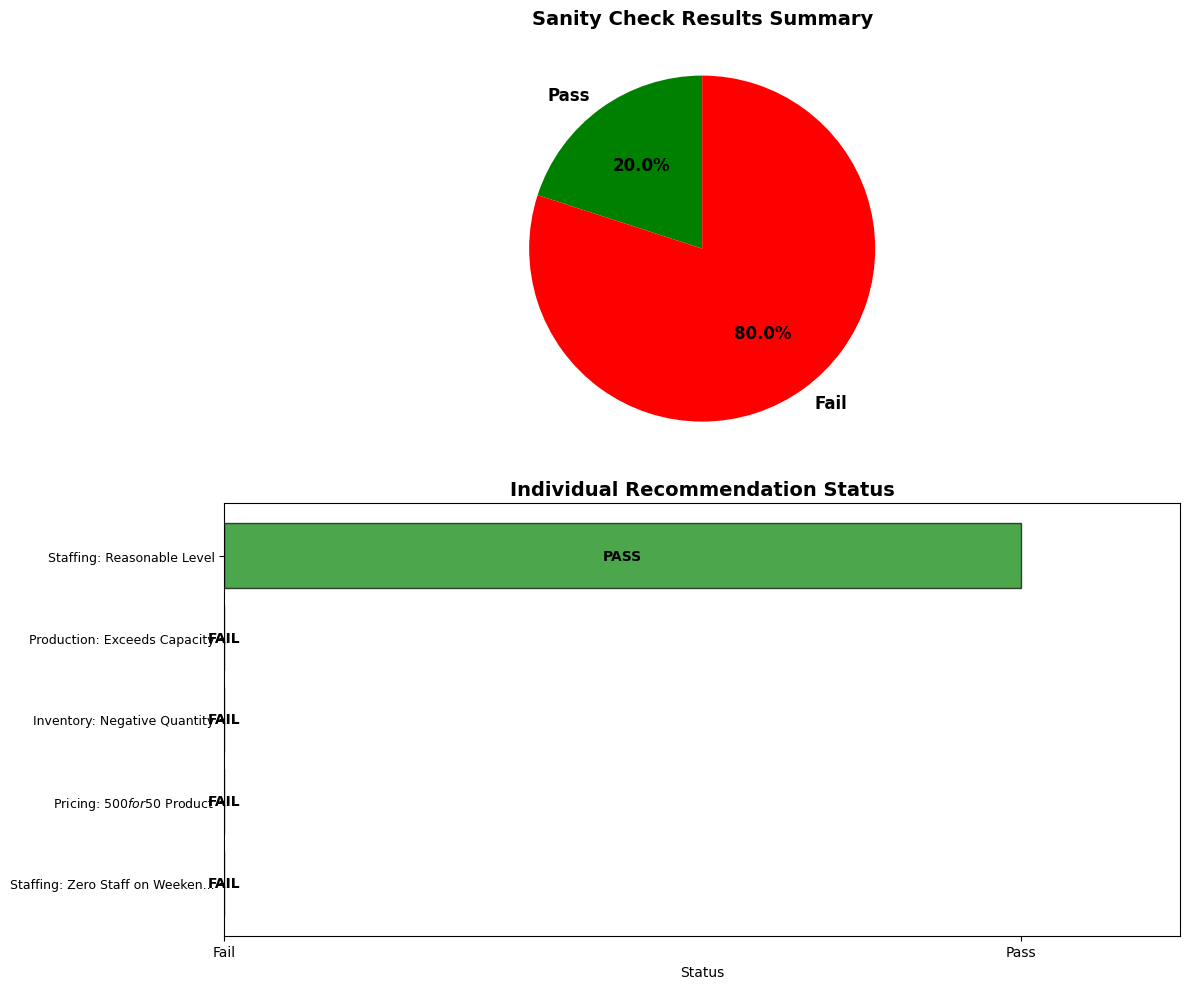


SUMMARY:
  Total Recommendations: 5
  Passed: 1
  Failed: 4
  Rejection Rate: 80.0%

  ⚠️  4 recommendations failed sanity checks and should be rejected or investigated


In [11]:
# Visualize - one plot per row for better readability
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Pass/Fail Summary
ax1 = axes[0]
pass_count = sum(results_df['Passes'])
fail_count = len(results_df) - pass_count
colors = ['green', 'red']
ax1.pie([pass_count, fail_count], labels=['Pass', 'Fail'], autopct='%1.1f%%', 
        colors=colors, startangle=90, textprops={'fontweight': 'bold', 'fontsize': 12})
ax1.set_title('Sanity Check Results Summary', fontweight='bold', fontsize=14)

# Plot 2: Individual Recommendations
ax2 = axes[1]
y_pos = np.arange(len(results_df))
colors_bar = ['green' if p else 'red' for p in results_df['Passes']]
bars = ax2.barh(y_pos, [1 if p else 0 for p in results_df['Passes']], color=colors_bar, alpha=0.7, edgecolor='black')
ax2.set_yticks(y_pos)
ax2.set_yticklabels([name[:30] + '...' if len(name) > 30 else name for name in results_df['Recommendation']], fontsize=9)
ax2.set_xlabel('Status')
ax2.set_title('Individual Recommendation Status', fontweight='bold', fontsize=14)
ax2.set_xlim(0, 1.2)
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Fail', 'Pass'])

# Add labels
for i, (bar, passes) in enumerate(zip(bars, results_df['Passes'])):
    label = 'PASS' if passes else 'FAIL'
    ax2.text(bar.get_width()/2, bar.get_y() + bar.get_height()/2,
             label, ha='center', va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

print("\nSUMMARY:")
print(f"  Total Recommendations: {len(results_df)}")
print(f"  Passed: {pass_count}")
print(f"  Failed: {fail_count}")
print(f"  Rejection Rate: {fail_count/len(results_df)*100:.1f}%")
print(f"\n  ⚠️  {fail_count} recommendations failed sanity checks and should be rejected or investigated")


## Step 6: Practice Creating Your Own Checklist

This final step encourages you to think about your own business context and create a customized sanity check checklist. Every business has unique constraints, regulations, and stakeholder expectations.

**What to consider when customizing**:
- **Your specific operational constraints**: What are the physical limits in your business?
- **Regulations that apply to you**: What are the legal/regulatory requirements?
- **Stakeholder expectations**: What will customers, employees, or partners accept?
- **Data quality issues**: What types of data errors are common in your context?

**Why customization matters**:
- A generic checklist might miss issues specific to your business
- Customized checks are more relevant and useful
- They reflect the actual constraints and requirements you face
- They help build organizational knowledge about what makes sense in your context

**Tips for creating your checklist**:
- Start with the categories provided, then add your own
- Include examples of failures you've seen before
- Review and update the checklist regularly as you learn
- Share it with your team to get different perspectives


In [12]:
# Template for custom checklist
custom_checklist_template = """
YOUR CUSTOM SANITY CHECK CHECKLIST:

1. OPERATIONAL FEASIBILITY
   [ ] Is this recommendation physically possible?
   [ ] Does it violate capacity constraints?
   [ ] Can we actually implement this?
   [ ] Add your specific operational checks here: _______________

2. REGULATORY COMPLIANCE
   [ ] Does it meet minimum requirements?
   [ ] Does it exceed maximum limits?
   [ ] Does it comply with regulations?
   [ ] Add your specific regulatory checks here: _______________

3. BUSINESS REASONABLENESS
   [ ] Will customers/stakeholders accept this?
   [ ] Does it align with business strategy?
   [ ] Is the cost/benefit reasonable?
   [ ] Add your specific business checks here: _______________

4. DATA QUALITY
   [ ] Are the inputs reasonable?
   [ ] Could there be data errors?
   [ ] Are assumptions realistic?
   [ ] Add your specific data quality checks here: _______________

CUSTOMIZE THIS CHECKLIST FOR YOUR SPECIFIC CONTEXT!
"""

print(custom_checklist_template)
print("\nPRACTICE:")
print("  • Think about a decision context in your work")
print("  • Create a sanity check checklist specific to that context")
print("  • Use it to evaluate model recommendations")
print("  • Refine it based on what you learn")



YOUR CUSTOM SANITY CHECK CHECKLIST:

1. OPERATIONAL FEASIBILITY
   [ ] Is this recommendation physically possible?
   [ ] Does it violate capacity constraints?
   [ ] Can we actually implement this?
   [ ] Add your specific operational checks here: _______________

2. REGULATORY COMPLIANCE
   [ ] Does it meet minimum requirements?
   [ ] Does it exceed maximum limits?
   [ ] Does it comply with regulations?
   [ ] Add your specific regulatory checks here: _______________

3. BUSINESS REASONABLENESS
   [ ] Will customers/stakeholders accept this?
   [ ] Does it align with business strategy?
   [ ] Is the cost/benefit reasonable?
   [ ] Add your specific business checks here: _______________

4. DATA QUALITY
   [ ] Are the inputs reasonable?
   [ ] Could there be data errors?
   [ ] Are assumptions realistic?
   [ ] Add your specific data quality checks here: _______________

CUSTOMIZE THIS CHECKLIST FOR YOUR SPECIFIC CONTEXT!


PRACTICE:
  • Think about a decision context in your work


## Summary: Sanity Checks

**What We Learned**:
- **Sanity checks** apply business judgment to evaluate whether recommendations make sense
- **Models can be wrong even when math is correct** - they may produce recommendations that are mathematically optimal but practically absurd
- **Sanity checks catch obvious problems** - they use business knowledge to identify recommendations that don't make sense
- **They're quick but powerful** - a few minutes of sanity checking can prevent costly failures

**Key Insights**:
1. **Always perform sanity checks**: Every recommendation should pass the smell test
2. **Use business judgment**: Your knowledge of the business is as important as the model's math
3. **Create a checklist**: A systematic checklist ensures you don't miss important checks
4. **Customize for your context**: Different businesses need different sanity check criteria

**Practical Application**:
- Always perform sanity checks before implementing recommendations
- Create a customized checklist for your business context
- Use business judgment to catch problems that math misses
- Don't blindly trust model outputs - apply your judgment
- Sanity checks are the last line of defense against bad recommendations
